# Research Challenge

<div style="background-color: #f8d7da; border-left: 6px solid #ccc; margin: 20px; padding: 15px;">
    <strong>💡 Margaret Atwood:</strong> Every aspect of human technology has a dark side, including the bow and arrow.
</div>

## 🏅 Build your own model

It is time to go back to supervised machine learning problems.

You have been assigned one dataset from [MatBench](https://matbench.materialsproject.org) as introduced in the [Lecture slides](https://speakerdeck.com/aronwalsh/mlformaterials-challenge-25). You are free to choose and tune any machine-learning model, with any Python library, but it should be appropriate for the problem. For instance, [XGBoost](https://xgboost.readthedocs.io) could be a good starting starting point to build a regression model. You can refer back to earlier notebooks and repurpose code as needed.

You may reach the limits of computing processing power on Google Colab. Building a useful model with limited resources is a real-world skill. Using other free resources is allowed if you find an alternative service, as is running on your own computer. A model tracker such as [wandb](https://wandb.ai) could be helpful for advanced users. If you want to try a brute force approach, a library such as [Automatminer](https://hackingmaterials.lbl.gov/automatminer) may be of interest.

This notebook should be used for keeping a record of your model development, submission, and even your presentation. You are free to edit (add/remove/delete) or rearrange the cells as you see fit.

### Your details

In [4]:
import numpy as np

# Insert your values
Name = "Kevin Tang" # Replace with your name
CID = 2232428 # Replace with your College ID (as a numeric value with no leading 0s)

# Set a random seed using the CID value
CID = int(CID)
np.random.seed(CID)

# Print the message
print("This is the work of " + Name + " [CID: " + str(CID) + "]\n")

# Define the available groups
groups = ['A', 'B', 'C', 'D', 'E']

# Select a group based on the seeded random state
challenge_group = np.random.choice(groups)

# Print the challenge code
print("Your challenge code is " + challenge_group)

This is the work of Kevin Tang [CID: 2232428]

Your challenge code is A


## Problem statement

You have been assigned one dataset from the [list](https://matbench.materialsproject.org/Benchmark%20Info/matbench_v0.1/) on [MatBench](https://matbench.materialsproject.org). You should state what problem you are trying to solve and comment on the best-performing model in the benchmark.

## Data preparation

Check the data distribution and apply appropriate pre-processing steps as required.

In [5]:
# Installation of libraries
#!pip install matminer # Datasets and featurisation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.4 MB/s eta 0:00:00
  Created 

In [2]:
# Get dataset info from matminer
from matminer.datasets import get_all_dataset_info
from matminer.datasets import load_dataset

# Detailed on https://hackingmaterials.lbl.gov/matminer/dataset_summary.html
# Uncomment the info line for your assigned challenge code

  # A
info = get_all_dataset_info("matbench_dielectric")

  # B
#info = get_all_dataset_info("matbench_expt_gap")

  # C
#info = get_all_dataset_info("matbench_expt_is_metal")

  # D
#info = get_all_dataset_info("matbench_glass")

  # E
#info = get_all_dataset_info("matbench_steels")

# Check the dataset information
print(info)

Dataset: matbench_dielectric
Description: Matbench v0.1 test dataset for predicting refractive index from structure. Adapted from Materials Project database. Removed entries having a formation energy (or energy above the convex hull) more than 150meV and those having refractive indices less than 1 and those containing noble gases. Retrieved April 2, 2019. For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.
Columns:
	n: Target variable. Refractive index (unitless).
	structure: Pymatgen Structure of the material.
Num Entries: 4764
Reference: Petousis, I., Mrdjenovich, D., Ballouz, E., Liu, M., Winston, D.,
Chen, W., Graf, T., Schladt, T. D., Persson, K. A. & Prinz, F. B.
High-throughput screening of inorganic compounds for the discovery
of novel dielectric and optical materials. Sci. Data 4, 160134 (2017).
Bibtex citations: ["@Article{Dunn2020,\nauthor={Dunn, Alexan

In [3]:
# Load your dataset into a pandas DataFrame
df = load_dataset("matbench_dielectric")

print(df)

                                              structure         n
0     [[4.29304147 2.4785886  1.07248561] S, [4.2930...  1.752064
1     [[3.95051434 4.51121437 0.28035002] K, [4.3099...  1.652859
2     [[-1.78688104  4.79604117  1.53044621] Rb, [-1...  1.867858
3     [[4.51438064 4.51438064 0.        ] Mn, [0.133...  2.676887
4     [[-4.36731958  6.8886097   0.50929706] Li, [-2...  1.793232
...                                                 ...       ...
4759  [[ 2.79280881  0.12499663 -1.84045389] Ca, [-2...  2.136837
4760  [[0.         5.50363806 3.84192106] O, [4.7662...  2.690619
4761  [[0. 0. 0.] Ba, [ 0.23821924  4.32393487 -0.35...  2.811494
4762  [[0.         0.18884638 0.        ] K, [0.    ...  1.832887
4763  [[0. 0. 0.] Cs, [2.80639641 2.80639641 2.80639...  2.559279

[4764 rows x 2 columns]


In [4]:
# 1. IMPORTS & SETUP
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.structure import DensityFeatures, StructuralHeterogeneity

In [7]:
if 'n' in df.columns:
    df = df.rename(columns={'n': 'target'})

# --- STEP 3: FEATURIZATION (The Heavy Lifting) ---
print("Generating features... ")

# 3a. Composition Features (Chemistry)
# We must create a 'composition' column from the structure first
df['composition'] = df['structure'].apply(lambda s: s.composition)

# Use "Magpie" to get atomic properties (electronegativity, valence, etc.)
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition", ignore_errors=True)

# 3b. Structural Features (Geometry)
# Density is critical for refractive index
density_feat = DensityFeatures()
df = density_feat.featurize_dataframe(df, col_id="structure", ignore_errors=True)

# Structural Heterogeneity (bond variance)
hetero_feat = StructuralHeterogeneity()
df = hetero_feat.featurize_dataframe(df, col_id="structure", ignore_errors=True)

Generating features... 


ElementProperty:   0%|          | 0/4764 [00:00<?, ?it/s]

DensityFeatures:   0%|          | 0/4764 [00:00<?, ?it/s]

StructuralHeterogeneity:   0%|          | 0/4764 [00:00<?, ?it/s]

Choose relevant features, which may be based on composition or structure, depending on your problem. [matminer](https://hackingmaterials.lbl.gov/matminer/) is a good place to start.

## Model selection, testing and training

Define your model and justify your choice based on the problem and available data. You can look back at earlier notebooks and investigate other examples online including in [scikit-learn](https://scikit-learn.org).

In [8]:
print("Cleaning and Splitting Data...")

# Keep only the numerical features (drop 'structure', 'composition', 'target', etc.)
non_feature_cols = ['structure', 'composition', 'target', 'id']
feature_cols = [c for c in df.columns if c not in non_feature_cols]

# Fill missing values (NaNs) with 0
df[feature_cols] = df[feature_cols].fillna(0)

X = df[feature_cols].values
y = df['target'].values

# Split: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Cleaning and Splitting Data...


In [9]:
print("Training XGBoost Model...")
model = XGBRegressor(
    n_estimators=500,    # Number of trees
    learning_rate=0.05,  # Speed of learning
    max_depth=6,         # Complexity of trees
    n_jobs=-1,           # Use all CPU cores
    random_state=42
)
model.fit(X_train, y_train)

Training XGBoost Model...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

Train, validate and test your model. Make sure to do proper data splits and to consider the hyperparamaters of your model.

<details>
<summary>Note on the ROC-AUC classification metric</summary>
There is one metric we didn't cover but is used in Matbench. In binary classification models, the ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score can be used to evaluate performance. It quantifies the ability of the model to distinguish between positive and negative instances across different decision thresholds. A higher ROC-AUC score (ranging from 0.5 to 1) indicates better performance, with 1 representing a perfect classifier and 0.5 indicating performance no better than random chance. There is a more detailed discussion here: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc.

The metric can be calculated using the `roc_auc_score` function from the `sklearn.metrics` module, e.g.

```python
from sklearn.metrics import roc_auc_score

# Assuming you have true labels (y_true) and predicted probabilities (y_pred_prob)
y_true = [...]  
y_pred_prob = [...]  

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Display the result
print(f'ROC-AUC Score: {roc_auc:.4f}')
```
</details>

In [ ]:
# Spare cell




## Model analysis and discussion

How well does your final model perform? Think of metrics and plots that are useful to dig a little deeper.

Compare against the best-performing model on the [MatBench](https://matbench.materialsproject.org) leaderboard.  With limited resources, don't expect to match this performance, but you should do better than a baseline model.

Evaluating...

FINAL RESULTS:
Mean Absolute Error (MAE): 0.3517
R² Score: 0.1852


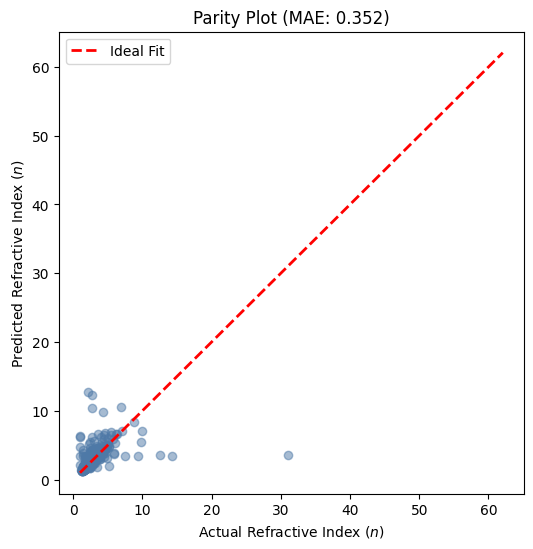

In [10]:
# Spare cell
print("Evaluating...")
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFINAL RESULTS:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Generate the Parity Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='#4E79A7')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Refractive Index ($n$)")
plt.ylabel("Predicted Refractive Index ($n$)")
plt.title(f"Parity Plot (MAE: {mae:.3f})")
plt.legend()
plt.show()



## Large Language Model (LLM) usage declaration

Acknowledge use of a generative model during your assignment. Points to consider:

* State which LLM (e.g. GPT-4, Gemini, Co-Pilot)

* Specify tasks (e.g. summarising research or code snippets)

* Were any limitations/biases noted?

* How did you ensure ethical use?

In [ ]:
# Spare cell




## ☘️ Final word

Good luck building your own model! We hope that you enjoyed the course and exercises. Dive deeper into the aspects that caught your interest. A useful starting point may be the [Resources](https://aronwalsh.github.io/MLforMaterials/Resources.html) page.

Remember that submission is on Blackboard and you should upload both the completed Juypter Notebook (`.ipynb` file), as well as your recorded narrated presentation (maximum 5 minutes; see guides on using [Zoom](https://www.youtube.com/watch?v=H9qhoAIzW3E) or [Powerpoint](https://www.youtube.com/watch?v=Y5dgwwa5XRA) for this purpose).